<a href="https://colab.research.google.com/github/Arup3201/deep-learning-materials/blob/main/1_Basics_of_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1: Understanding the basics of Deep Learning
## Table of contents:
* **1. Deep Learning in Nutshell**
  * Traditional Programming
  * How machine learning is different
  * What is Deep Learning?
* **2. Introduction to the Task**
  * Explain the goal of the first lecture: to build a basic neural network that performs a task similar to linear regression.
  * Briefly recap the concept of linear regression and how it predicts a continuous output.
  * Highlight the advantages of using neural networks for more complex tasks.

* **3. Dataset Overview**
  * Introduce the dataset that will be used for the demonstration.
  * Emphasize that it's a simple dataset with just one input feature and one output target.
  * Show a few examples from the dataset for visualization.

* **4. Building the Basic Neural Network**
  * Introduce the keras.layers.Dense layer and its function in creating a neural network.
  * Explain the number of neurons in the input layer (1) and output layer (1) for this task.
  * Mention the use of a single hidden layer for simplicity.
  * Show how to define the model architecture using TensorFlow Keras.

* **5. Compiling the Model**
  * Explain the concept of model compilation and its components (optimizer, loss function, metrics).
  * Use Mean Squared Error (MSE) as the loss function for regression.
  * Choose an optimizer such as Stochastic Gradient Descent (SGD).
  * Mention Mean Absolute Error (MAE) as a metric for evaluation.

* **6. Training the Model**
  * Prepare the data for training (input features and target values).
  * Demonstrate the training process using the model.fit method.
  * Show how to specify the number of epochs and batch size.
  * Monitor the training progress and discuss how the loss decreases over epochs.

* **7. Visualization**
  * Visualize the training data points on a scatter plot.
  * Plot the predicted line (output of the neural network) on the same scatter plot.
  * Visually show how the neural network's output line evolves with training.

* **8. Model Evaluation**
  * Calculate the Mean Squared Error and Mean Absolute Error on the training data.
  * Discuss the model's performance and how it compares to a traditional linear regression model.

* **9. Making Predictions**
  * Use the trained model to make predictions on new data points.
  * Show how to input a new data point and get the predicted output.

* **10. Conclusion and Next Steps**
  * Recap the key points covered in the first lecture.
  * Emphasize that they have built their first neural network successfully.
  * Encourage students to explore more complex architectures and tasks in future lectures.

## Deep Learning in Nutshell

Programming has been the bread and butter for many developers since the discovery of computers.

Whenever developers needed to make any computer applications, they will usually break down the compononents of the applications and solve those compononents as individual problems and code their rules to solve that particular problem.

Let's say for example, we are to create a game for playing with ball. The ball can jump from down to up and whenever it hits the blocks at the top the blocks disappear and we get points. But, everytime when the ball comes down after hitting one or more blocks we need to catch that ball with a small black surface. If we fail to catch the ball then we will lose.

![Ball Game](https://www.heroconcept.com/wp-content/uploads/2018/09/breakout.jpg)

So, we break down the problem of creating this game into different problems and let's say we focus our attention to the problem of hitting the bricks at the top and controlling the balls movements after that.

```c
if(ball.collide(brick)) {
  removeBrick();
  ball.dx = -1*(ball.dx);
  ball.dy = -1*(ball.dy);
}
```

BUT, the question comes when we try to solve the problems which are more general and common but can't be easily expressed as rules by us.

You are asked to make an application that can detect whether a person is walking/running/biking/hiking?

![Problem with deep learning](https://i.postimg.cc/NMH9vhGv/problems-with-deep-learning-images.png)

What will you do?

Maybe for walking/runnung/hiking you can say
```c
if(speed < 4) {
  status=walking;
}
else if(speed < 10) {
  status=running;
}
else {
  status=biking;
}
```

But what about hiking?

How can you define it?

Even though walking/running/biking is not as simple as just mentioning their speed. Different person has different speeds and other factors like someone going up and down while running, how that looks like... all these things play an important role in determining their state.

That is where Machine Learning comes into picture.

Machine Learning is essentially doing the same thing but changing the same old way of writing code by yourself to define those rules.

When we talk about traditional programming, we had to define how walking looks like, how running looks like, how biking looks like etc...

![Deep Learning in Nutshell](https://i.postimg.cc/Bn4x5vSL/Deep-Learning-in-Nutshell.png)

Now, instead of you specifying how walking/running/biking/hiking look like (e.g. `speed < 4` or things like that), you provide how they looks like, when a person walks what it looks like, when a person runs what it looks like, along with the labels that labels those examples like if a person is walking then the label will be WALKING, if a person is running then label will be RUNNING and so on. And from that what we will get is the rules that define those states. *This is machine learning in nutshell*.

For example, when the machine learning system learns about all these states, maybe it will notice that when a person runs their feet will have a certain distance range, or when a person is biking their will be something like a cycle in the image, all this tiny tiny details will be taken into account by the system itself and it will automatically find out those rules/conditions when learning from the data and answers provided to it in this case they are images of people walking/running/biking/hiking and their labels.

NOTE: **Neural network is just an advance version of machine learning which is called deep learning.**

## Introduction to the Task

### Our Goal in this Notebook
The Goal of this leacture is to explain you how neural networks can implement linear regression and give not just the same but even better solutions.


---


### A brief recap on Linear Regression

Linear Regression model is just a linear function of the inputs given to the model. If the input we have is $x_1$ then linear regression model will be linear function of $x_1$ and then the equation of that linear function will look like this - $ŷ = w_1*x_1 + b$ ______(eq. 1)

For the more than one inputs, the equation would look like this -
$ŷ = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + b$ _______(eq. 2)

In this equation-
* $ŷ$ : The predicted value for all the n input(s)
* $w_i, b$ : The parameters of the model, weights and bias respectively, for $i=1, 2, ...n$ in the equation.


More generaly, the linear regression model is just the weighted sum of the imputs, plus a constant term called bias.

The eq. 2 can also be written in the vectorized form like this -
$$ŷ = h_{W, b}(X) = W^T.X + b$$


Till this point, we have discussed about the prediction part. But, the main thing model is learning. To make the learn, it needs to set it's parameters (W, b) in such a way that best fits the training data. For this, the models needs 2 things -
1. A function that can measure the performance of the model so that the model can improve itself in the right direction. In this step, we will choose a loss function which can tell us ***how much far away we are from our expected model***, that will hopefully give all results correctly.
2. Another functionality for actually improving the parameters of the model after looking at the performance. If the model performes very badly then the improvement will be more and when the model starts performing well, the speed of improvement will slower. This is called optimization the model.

As for the loss function, it is quite a trend to choose the **Mean Squared Error (MSE)**, therefore to get the expected model we need to find those values of `W and b` that can minimize the MSE of our model.

The equation for the MSE is-
$$MSE(W, b) = \frac{1}{m} * \sum({ŷ^{(i)} - y^{(i)}})^2$$

---

### Advantange of Neural Networks over other ML algorithms

1. Here, we are looking at the linear regression problem and solving it by neural networks. But, neural networks can do a lot more. This notebook is just a demonstration of one of it's applications.

2. Neural networks has the power to learn anything which a human can do and it can perform some tasks with much more efficiency than human.

3. The best example of the power of deep neural networks is `ChatGPT` which is an advanced version of GPT launched by OpenAI till now. It is trained on Trillions of data and it has learnt to generate contents with a monsterous efficiency. Now, you will notice people using ChatGPT to come up with content ideas.

P.S. This lecture's sequence is also something that I have came up with the help the ChatGPT.😉

### Library Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Dataset Overview

The de-facto method of using data for training or passing anything in neural network is through python numpy array which is a special type of containers that helps to efficiently compute in neural network for list type data.

### Download the dataset

In the next cell, we will download the dataset. The dataset is stored in `.npz.npy` format which means it is in numpy array format.

In [9]:
!wget "https://github.com/Arup3201/deep-learning-materials/raw/main/datasets/1%20-%20XY%20dataset.zip"
!mkdir /content/datasets/
!unzip /content/1\ -\ XY\ dataset.zip -d /content/datasets/
!rm -r /content/1\ -\ XY\ dataset.zip

--2023-08-02 14:09:24--  https://github.com/Arup3201/deep-learning-materials/raw/main/datasets/1%20-%20XY%20dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Arup3201/deep-learning-materials/main/datasets/1%20-%20XY%20dataset.zip [following]
--2023-08-02 14:09:24--  https://raw.githubusercontent.com/Arup3201/deep-learning-materials/main/datasets/1%20-%20XY%20dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5126 (5.0K) [application/zip]
Saving to: ‘1 - XY dataset.zip’

1 - XY dataset.zip  100%[===================>]   5.01K  --.-KB/s    in 0s      

2023-08-02 14:09:24 (55.7 M

### Introduction to the dataset

Inside `datasets` directory, we have 2 numpy array files in the format of `.npy`, one of `Xs.npy` and other is `Ys.npy`. Both can be loaded using `np.load(file_path)` method call.

The dataset is a synthesised dataset, means I have created it by myself. It is not a real-world dataset. But, it will be the best example for understanding the working of neural networks.

In [10]:
X = np.load("datasets/Xs.npy")
Y = np.load("datasets/Ys.npy")

The dataset contains 1200 examples. X and Y both are of shape `(1200,)` which means they are 1-D numpy array, as the shape contains 1 element inside it.

In [11]:
print(f"Shape of the Inputs: {X.shape}")
print(f"Shape of the Inputs: {Y.shape}")

Shape of the Inputs: (1200,)
Shape of the Inputs: (1200,)


### A simple dataset

In this dataset, we have X which is just a single input and Y which is a single target value that our neural network model needs to learn.

This makes it a simple dataset and working on it will make the concepts more clear as we already know that it follows a linear trend.

Let's look at the first 10 examples of this dataset. The dataset has it's X values starting from -200 and going till +1000 values, and the Y is linearly mapped with the X. You can see the values in X and Y are in decimal which means the type of the data is float.

In [12]:
print(f"First 10 elements from X and Y are:")
print(f"X: {X[:10]}")
print(f"X: {Y[:10]}")

First 10 elements from X and Y are:
X: [-200. -199. -198. -197. -196. -195. -194. -193. -192. -191.]
X: [-726.3 -722.6 -718.9 -715.2 -711.5 -707.8 -704.1 -700.4 -696.7 -693. ]


### Few Examples from the dataset to visualize

We will look at the above 10 examples and visualize them with the help of `matplot.pyplot`'s `plot` method. We can pass `X[:10]` and `Y[:10]` to it and then it will create a graph with it's x-axis representing the `X`s and y-axis representing the `Y`s.

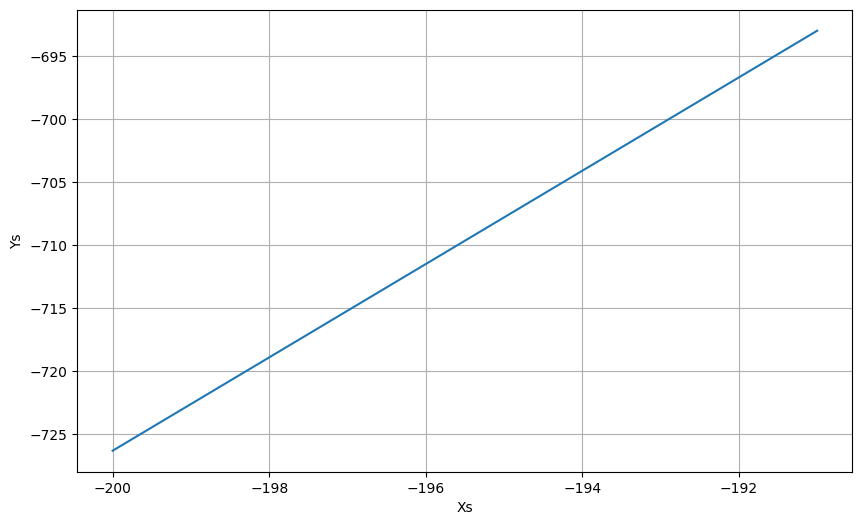

In [13]:
# Define the figure with a figure size
plt.figure(figsize=(10, 6))

# Plot the time series data
plt.plot(X[:10], Y[:10], '-')

# Label the x-axis
plt.xlabel("Xs")

# Label the y-axis
plt.ylabel("Ys")

# Overlay a grid on the graph
plt.grid(True)

# Draw the graph on screen
plt.show()

## Building the Basic Neural Network

### Introducing the `tf.keras.Sequential` API
Someone can make neural networks in many different approaches. There are a lot of libraries out there which can efficiently build a neural network with ease and then train it on dataset. Someone can also make it from scratch to customize with their problem in hand. But, in this notebook, we will look at the easiest one among. `Tensorflow` provides `keras` interface which can build neural networks in not more than 3 lines of code.
The API we will use here is `tf.keras.Sequential` which enables us to stack one layer after another and build the network.

### Introducing `tf.keras.layers` as the base of neural network
The building blocks of a neural network are the `layers` present inside it. You can think of `layers` as a filter through which the data is going through and everytime the data passes one `layer`, the `layer` transforms the data into a more useful form that helps to map it to the answer. In this example, we are only using 1 unit so it might not be that much visible to understand what a layer does but in the upcoming examples it will become more clear.

### Some details regarding `tf.keras.layers.Dense`
`Dense` is the layer that we will be using for implementing the linear regression model. We can specify how many neurons we want in this layer with the `units` arguement present in `Dense` class. If there are 2 `Dense` layers connected with each other, we call it `fully-connected layer`.

### The neural network architecture
In this notebook file, we will look at some of the basic layers to make a neural network architecture. In this example, we will particularly look at 3 layers -
1. `Input` layer: This is the layer through which the input values will pass. The `Input` layer takes the `shape` of the input. In this example, the inputs are just 1 so `shape=[1]`.
2. `Dense` layer: The `Dense` layer takes `units` arguement which is simply how many neurons does we want in this layer. In this example, we want one output so `units=1`.
3. `Activation` layer: The `Activation` layer which applies an activation function (in this case, it is `linear`) on the output of the previous layer (in this case, it is Dense layer with 1 unit).

### `units=1` in `Dense` layer
As we are implementing simple linear regression model, we just need one neuron. This one neuron has weight and bias (`W and b`) which will be learnt by the model from the training data. This makes it a very simple neural network which has only 2 parameters to learn from the training samples. It makes the training faster also because the complexity is very less.

### Defining the model architecture with `tf.keras.Sequential`

In [42]:
model = keras.Sequential([
    keras.layers.Lambda(lambda x: x/100, input_shape=[1]),
    keras.layers.Dense(units=1),
    keras.layers.Activation('linear')
    ])

## Compilation of the model

### A look into the parts of compilation
Once the model architecture is defined, we need to pick three more things as part of the _compilation_ step.
* `optimizer`: The mechanism through which the model will update itself based on the training data it sees, so as to improve it's performance.
* `loss`: How the model will be able to measure it's performance on the training data and thus how it will be able to steer itself to the right direction of improvement.
* `metrics`: This is a list of all the measures that I want to see at the time of training. This is to monitor the success of the model. The model does not optimize for the metrics. As such, metrics do not need to be differentiable.

### A look into how model is using loss and optimizer in it's training process
Neural network at first don't know what is the relation between the X and Y, but it tries to guess that, which is intially really bad. But, as it goes through the examples and calculates the output with its intially guessed rules, it finds out that those outputs are not exactly same as the output provided in the examples, with the help of the `loss` function. So, it improves it's guess with the help of `optimizer` and again starts guessing with new model parameter values(`w` and `b`). The logic is, every time the guess should be better than the previous one, which is the job of optimizer.

> As it approaches towards the 100% accuracy or zero loss we use the word `convergence`.
Remember one point here, `compile(optimizer='...', loss='...', metrics=[...])` method does not tell the network to start guessing, instead it tells the network how the network is going to find about the performance(loss) and how it is going to improve(optimizer).

### `mse` as loss function
`mse` stands for `mean squared error`. As the name of the loss function says, it is the mean of the squared errors. If the output of the neural network is `̂y` and the target value is `y` then the error would be `y - ̂y`, then take it's sequare and calculate the mean over all examples in the training dataset. So, the equation looks like- $$MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - ŷ^{(i)})^2$$
The loss function we are using here is the MSE loss. The way to pass it to `compile` method is by passing `loss='mse'` to it.

### `sgd` as optimizer
`sgd` stands for `Stochastic Gradient Descent`. As we discussed earlier, optimizer is the brain of deep neural networks because it actually helps the network to learn new things and adapt itself according to the problem at hand. Gradient Deccent is the algorithm that actually is behind this learning process. There are different types of gradient descent but the one we are talking about here is the stochastic gradient descent.
Simply put, it is all about whether to learn from the training data after we have finished processing all data or immediately processing one data. Stochastic gradient descent is the later one. In SGD, we pick randomely one data point from the set and process it. After finding the performance, we start improving the model.

### `mae` as metrics
`mae` stands for `mean absolute error`. It is very much similar type of measure like mae but the difference is instead of taking the square of the error, we take the absolute value of the error which makes it always positve.
$$MAE = \frac{1}{m}\sum_{i=1}^{m}|y - ŷ|$$

In [43]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mae'])

## Training the model with `fit` method
### How `fit` method works
The `training` takes place in this `.fit` method. Here, the things that happens are-
* Make a guess
* Find out how good or how bad the guess is using `loss`
* Use `optimizer` to find out better rules that gives better guess
* Repeat this for `epochs` times.

The `fit` method is essentially trying to find out how it can fit the `X` values to the given `Y` values, which is same as saying learning the relation between `X` and `Y`.

In [ ]:
history = model.fit(X, Y, epochs=100, batch_size=32)

### Let's visualize the improvement of the model in each epoch

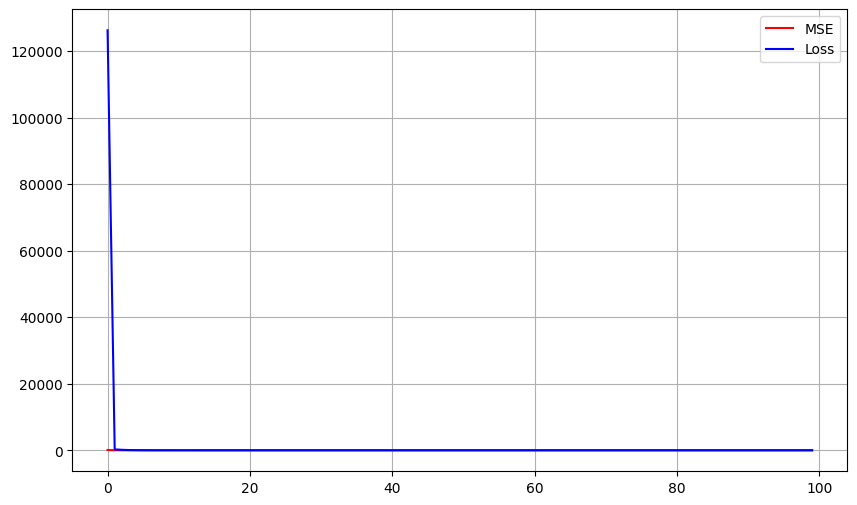

In [46]:
# Define the figure with a figure size
plt.figure(figsize=(10, 6))

# Create the epochs sequence
epochs = np.arange(100)

# Plot the Xs and Ys for first 10 values
plt.plot(epochs, history.history['mae'], 'r-', label='MSE')
plt.plot(epochs, history.history['loss'], 'b-', label='Loss')


# Show the legends for actual y and predicted y
plt.legend()

# Overlay a grid on the graph
plt.grid(True)

# Draw the graph on screen
plt.show()

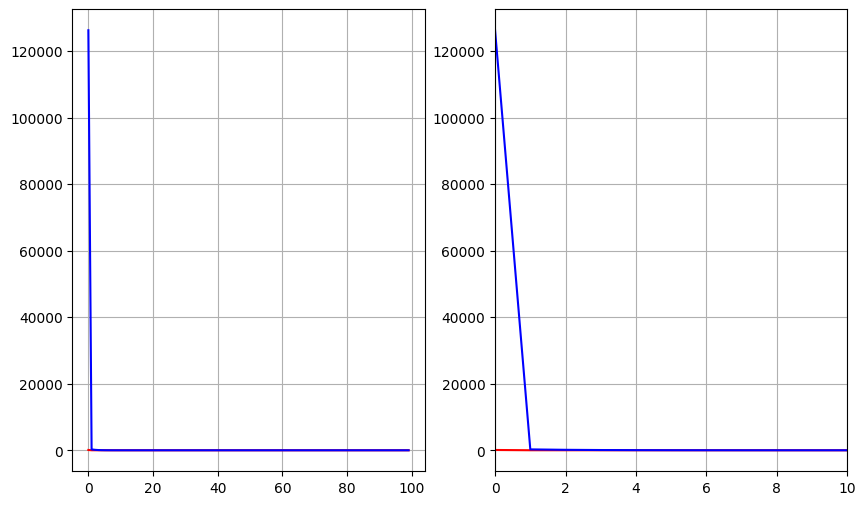

In [55]:
# Define the figure with a figure size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Create the epochs sequence
epochs = np.arange(100)

# Plot the Xs and Ys for first 10 values
ax[0].plot(epochs, history.history['mae'], 'r-', label="MAE")
ax[0].plot(epochs, history.history['loss'], 'b-', label='Loss')

ax[1].plot(epochs, history.history['mae'], 'r-', label="MAE")
ax[1].plot(epochs, history.history['loss'], 'b-', label='Loss')

ax[1].set_xlim(0, 10)

# Overlay a grid on the graph
ax[0].grid(True)
ax[1].grid(True)

# Draw the graph on screen
plt.show()

### Visualizing the training data points

Plot the target values predicted by the model versus the actual target values and see how good or bad the model is right now. The 2 lines are in 2 different colours.

Model Predicted Values: `Red`
Actual Target Values: `Blue`

38/38 [==============================] - 0s 2ms/step


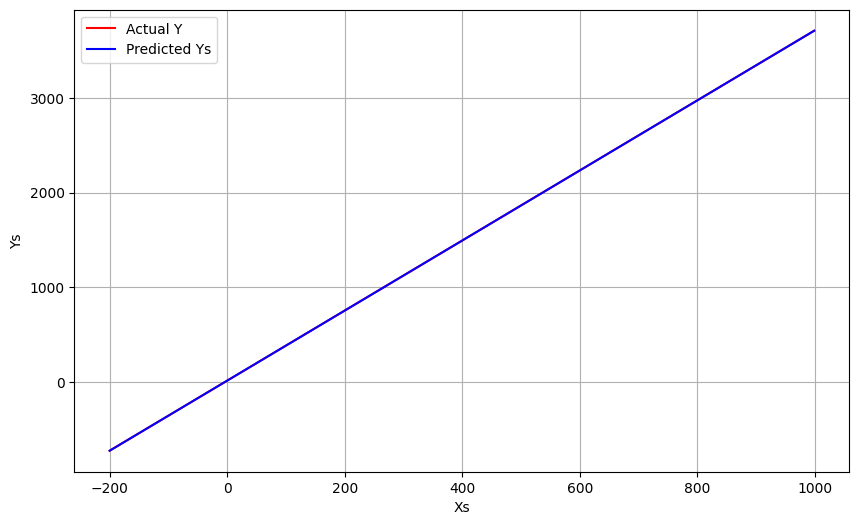

In [40]:
# Define the figure with a figure size
plt.figure(figsize=(10, 6))

# Plot the Xs and Ys for first 10 values
plt.plot(X, Y, 'r-', label='Actual Y')


# Get the model's predicted values for the first 10 Xs
Y_hats = model.predict([X])

# Plot the Xs and Model Predicted Ys
plt.plot(X, Y_hats, 'b-', label="Predicted Ys")

# Label the x-axis
plt.xlabel("Xs")

# Label the y-axis
plt.ylabel("Ys")

# Show the legends for actual y and predicted y
plt.legend()

# Overlay a grid on the graph
plt.grid(True)

# Draw the graph on screen
plt.show()

😳 It exactly overlaps with the actual values of `Y`. How good our model has become on the training set. But, that is how it is on training set, we don't know what will happen for unseen data.

### Predicting for new unseen values with `predict` method

Now that the model is trained with the data, it is time to see what it outputs on data which it has not previously seen, this step is also known as `testing`. It has not seen 10.0, so let's check what it outputs when we pass 10.0 as the input using the `predict` method.

In [36]:
model.predict([10.0])

1/1 [==============================] - 0s 63ms/step


array([[50.70007]], dtype=float32)

After learning from the examples, this model is able to predict the result for 10.0

Although the result is not exactly 19.0 but very close to 19.0

The reason is, our data is very small from which the model learnt so it was not able to learn everything and just from the 6 data points model will not have that much accuracy and confidence.

### Looking into the values of the weights with `get_weights` method

In [35]:
model.get_weights()

[array([[370.]], dtype=float32), array([13.700073], dtype=float32)]

From the result, you can see the coeffecient of X is very close to 2 and the bias value of close to -1.